In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.api as sm
import matplotlib
df = pd.read_csv('desktop/earthquakes6.csv')

In [3]:
df.dropna(subset=['mag', 'time', 'latitude', 'longitude'])
X = df[['mag', 'time', 'latitude', 'longitude']]
X

,mag,time,latitude,longitude
0,4.9,2018-11-27T14:34:20.900Z,48.3780,154.9620
1,4.8,2018-11-26T23:33:50.630Z,36.0733,139.7830
2,4.5,2018-11-26T13:04:02.250Z,38.8576,141.8384
3,4.6,2018-11-26T05:20:16.440Z,50.0727,156.1420
4,4.6,2018-11-25T09:19:05.010Z,33.9500,134.4942
...,...,...,...,...
14087,5.3,2001-01-04T04:18:21.430Z,36.9810,138.6290
14088,5.9,2001-01-03T14:47:49.540Z,43.9320,147.8130
14089,4.6,2001-01-03T09:32:54.710Z,45.3010,149.9410
14090,4.9,2001-01-02T20:29:49.670Z,32.2390,141.5080


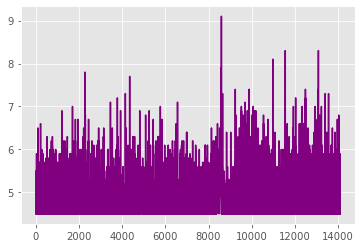

In [4]:
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
plt.style.use("ggplot")
X["mag"].plot(color="purple")
plt.show()

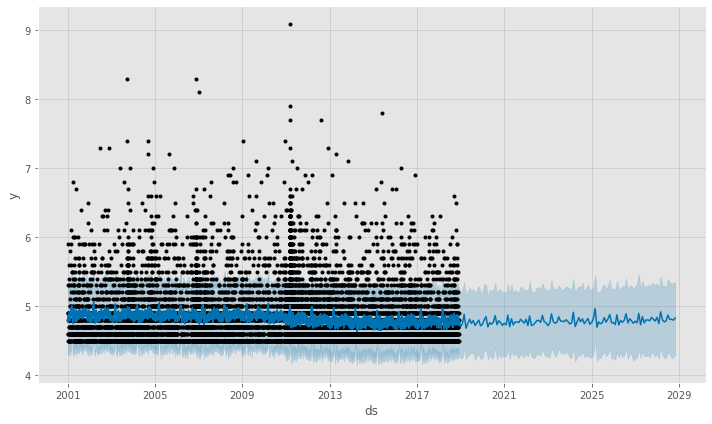

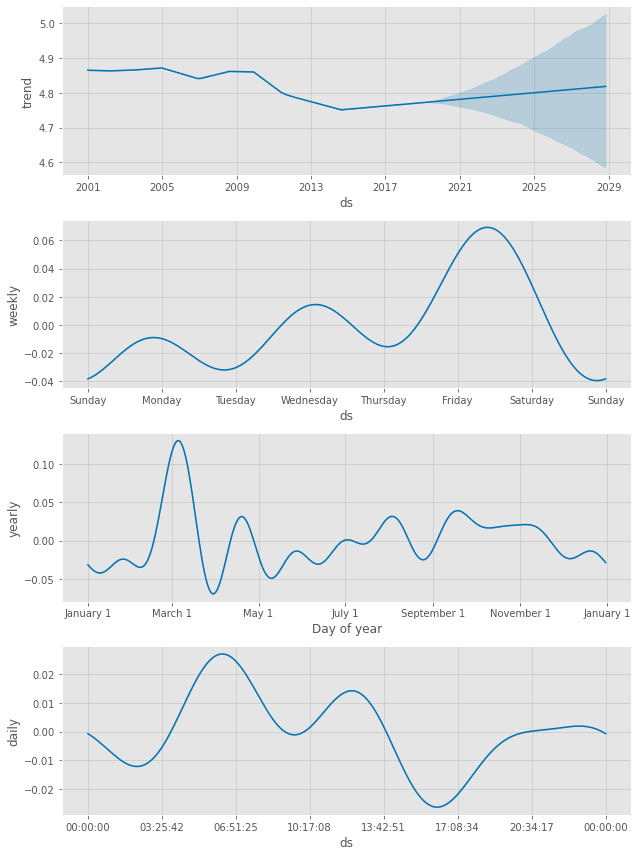

In [9]:
from fbprophet import Prophet
from fbprophet.plot import plot_plotly
from sklearn.model_selection import train_test_split
y = X["mag"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
X_train = pd.DataFrame()
X_train['ds'] = pd.to_datetime(df["time"], utc=True)
X_train['ds'] = X_train['ds'].dt.tz_convert(None)
X_train['y'] = y
prediction = Prophet()
prediction.fit(X_train)
future = prediction.make_future_dataframe(periods=120, freq='m')
forecast = prediction.predict(future)
figure = prediction.plot(forecast)
figure = prediction.plot_components(forecast)